# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the Data
df=pd.read_csv("Titanictrain.csv")

In [3]:
# Printing the data with head 10
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
# checking the data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Missing Data
We can use seaborn to create a simple heatmap to see where are the missing data

In [6]:
# if it is True that value is Null(NAN) and if it is False that value is Not Null(No NAN)
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
#  checking the percentage of missing data
(df.isnull().sum()*100)/df.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [19]:
# checking columns with missing values

cols_with_missing_vals=df.columns[df.isnull().any()]
data1=df[cols_with_missing_vals].isnull().sum()
print(data1)
print(len(data1))

Age         177
Cabin       687
Embarked      2
dtype: int64
3


In [20]:
# checking columns with missing values in percentage

data2=(df[cols_with_missing_vals].isnull().sum()*100)/df.shape[0]
print(data2)
print(len(data2))

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64
3


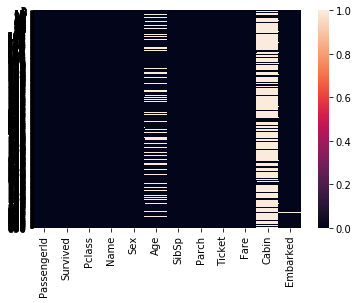

In [7]:
# plotting the graph to check the null values
sns.heatmap(df.isnull(),xticklabels=True,yticklabels=True)

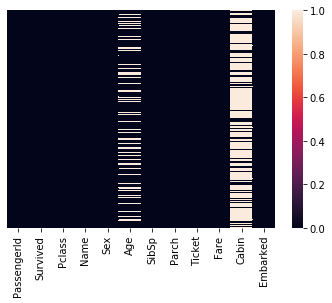

In [11]:
# Yticklabels=False it will not print the values i.e, rows in y-axis
# xticklabels=True is by default it is True
# All the Null values is shown in White color
sns.heatmap(df.isnull(),yticklabels=False)

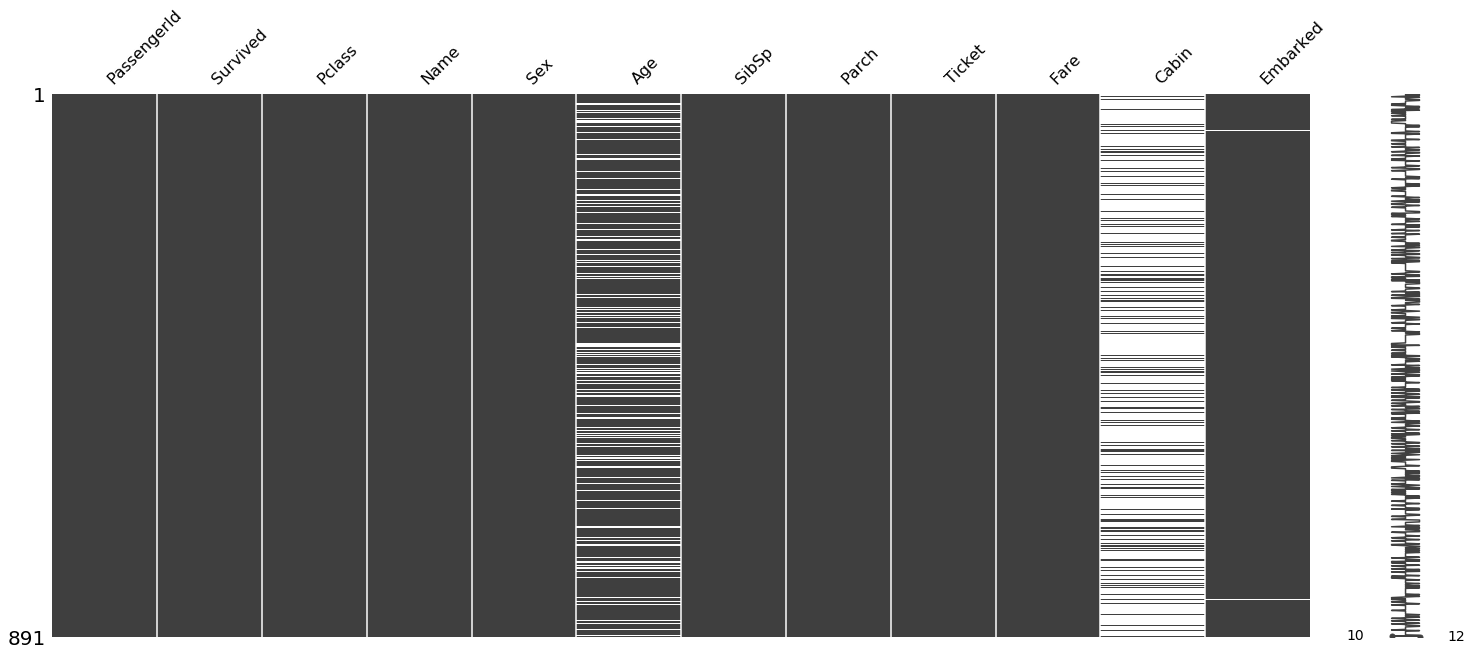

In [6]:
# missing
!pip install missingno
import missingno
missingno.matrix(df)

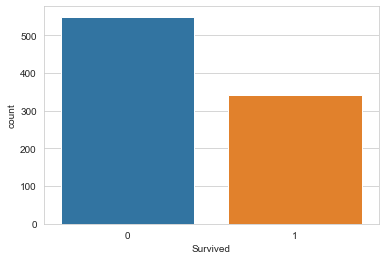

In [14]:
# Checking how many survived and not survived by using countplot
# here 0 means not survived and 1 means survived
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=df)

1. Observation
 - Around 550 Passengers are not survived and around 350 Passengers are survived

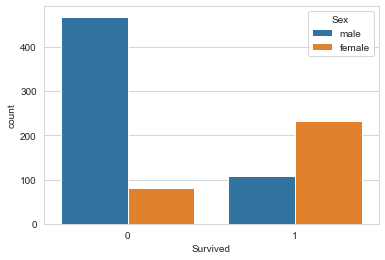

In [15]:
# Now checking how many females and males are survived and how many are not survived

sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Sex",data=df)

1. Observation (1=Survived, 0=Not survived)
 - Around 105 male Passengers are survived and around 220 female Passengers are survived
 - Survived Passengers is Females>Males
 - Around 500 male and around 90 female Passengers are not survived
 - Not Survived Passengers is Male>Female

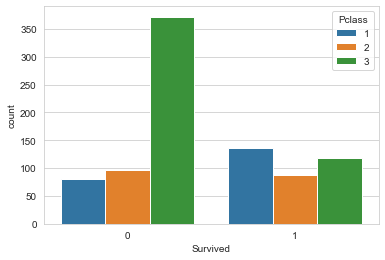

In [16]:
# Now checking the Survival data with respect to PClass

sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Pclass",data=df)

1. Observation
 - Around 140 Passengers in 1st class, around 90 Passengers in 2nd class and around 120 Passengers in 3rd class are Survived
 - Survived Passengers with respect to class is 1st>3rd>2nd
 - Around 400 Paasengers in 3rd class, around 100 passengers in 2nd class and around 80 Passengers in 1st are not survived
 - Not Survived Passengers with respect to class is 3rd>2nd>1st

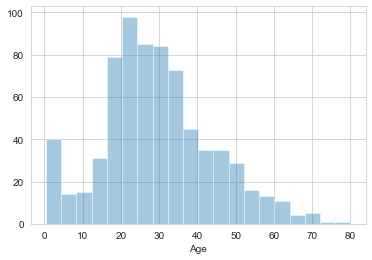

In [24]:
# checking the Age 
sns.distplot(df.Age.dropna(),kde=False)

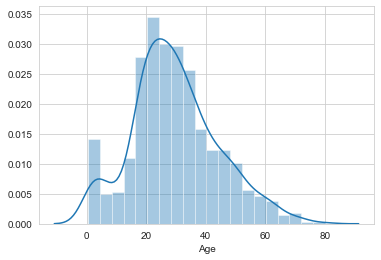

In [25]:
sns.distplot(df.Age.dropna(),kde=True)

1. Observation
 - Maximum Passengers around 18 to 30 Age are more
 - The Bell curve is in the shape of Normal Distribution

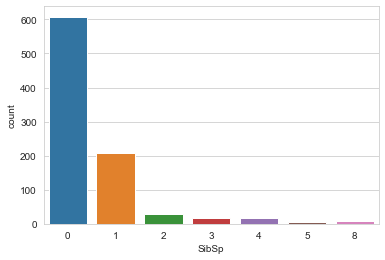

In [26]:
# checking with respect to SibSp

sns.countplot(df.SibSp)

1. Observation
 - Who had no sibling are more when comapred 1,2,3,4,5 and 8 siblings
 - 1 is saying that travelling with spouse

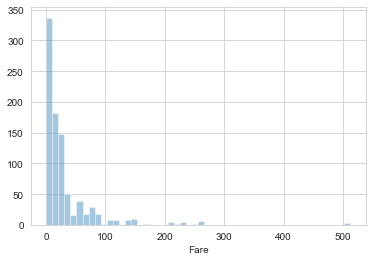

In [28]:
# Checking with Fare

sns.distplot(df.Fare,kde=False)

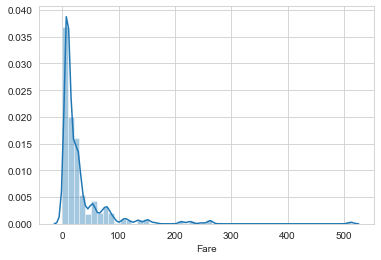

In [29]:
sns.distplot(df.Fare,kde=True)

1. Observation
 - Less Fare more number of Passengers
 - Here bell curve is right skewed

# Data Cleaning
We want to fill in missing Age data instead of just droping the missing age data rows. One way to do this by filing with mean of age. or by some relate to age or anything. Now we can do by checking the average age by PClass.

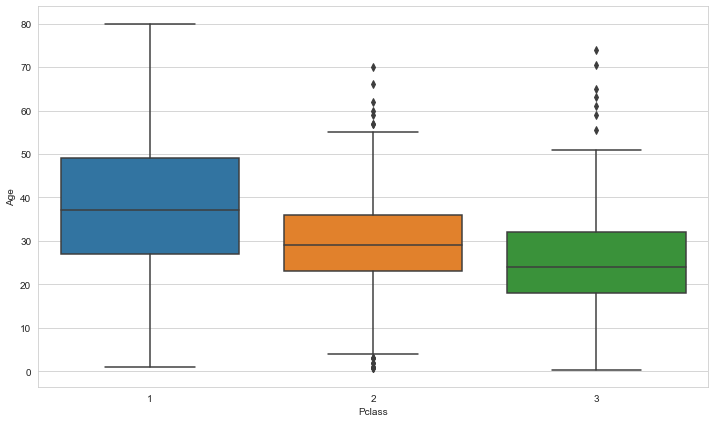

In [30]:
# checking the Ages with respect to Pclass
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df)

1. Observation
 - For 1st class the Average Age is around 37
 - For 2nd class the Average Age is around 29
 - For 3rd class the Average Age is around 24
 - We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [31]:
# Now we can repalce the NAN values in Age with respect to Pclass

def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
        

In [32]:
# Now applying the function in data

df["Age"]=df[["Age","Pclass"]].apply(impute_age,axis=1)

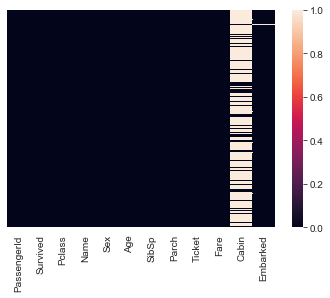

In [34]:
# Now lets check with the heat map wheather the values changed or not

sns.heatmap(df.isnull(),yticklabels=False)

1. Observation
 - Here there are no null values in Age column as we replaced with Average age of Pclass

In [35]:
# As there are lot of Null values in column Cabin, so we can drop that column now

df.drop("Cabin",axis=1,inplace=True)

In [36]:
# Now checking wheather the cabin column is dropped or not

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


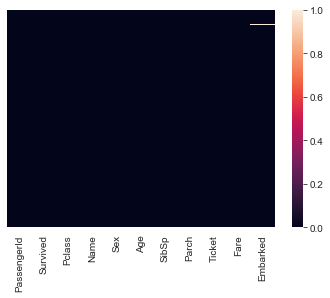

In [37]:
# Now lets check with heatmap again is there any missing values

sns.heatmap(df.isnull(),yticklabels=False)

1. Observation
 - Now there are no null values in Age 
 - We dropped the Cabin column 
 - There are some null values in Embarked (Categorical)column, we need to replace them with respect to any column

In [38]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

1. Observation
 - Now there are lot of S. Now we can repalce all null values with S

In [39]:
# Replacing Embarked null values

df.Embarked.isnull()="S"

SyntaxError: can't assign to function call (<ipython-input-39-9f8aa2ee0010>, line 3)

In [40]:
# Replacing Embarked null values
df.Embarked[df.Embarked.isnull()]="S"

C:\Users\HI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


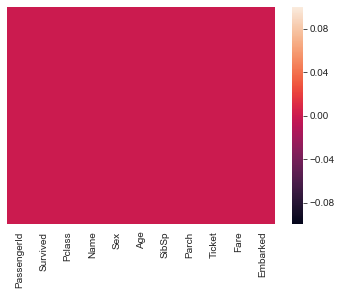

In [41]:
# Now lets check again with heatmap again is there any missing values

sns.heatmap(df.isnull(),yticklabels=False)

1. Observation
 - Now we successfully replaced and dropped the null value columns
 - Now there are no null values in our dataset

In [42]:
df.Embarked.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [44]:
cols_missing_vals=df.columns[df.isnull().any()]
data2=df[cols_missing_vals].isnull().sum()
print(data2)
print(len(data2))

Series([], dtype: float64)
0
